In [3]:
import pandas as pd
import numpy as np

path = r"/Users/kevin.reilly/Library/CloudStorage/OneDrive-TheTradeDesk/repos/baseballdatabank/core/Batting.csv"

df = pd.read_csv(path)

pop = len(df)
print ("Total records:")
print (pop)
print ("")
print ("The summary stats:")
df.describe()

Total records:
112184

The summary stats:


,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,112184.000000,112184.000000,112184.000000,112184.000000,112184.000000,112184.000000,112184.000000,112184.000000,112184.000000,111428.000000,109816.000000,88642.000000,112184.000000,110084.000000,75533.000000,109368.000000,106116.000000,76080.000000,86742.000000
mean,1968.863029,1.080386,50.475469,137.928136,18.305890,35.993003,6.155200,1.221048,2.863367,16.645699,2.871339,1.149444,12.727430,20.679327,1.023407,1.063135,2.137689,1.008373,2.857808
std,40.230937,0.289915,46.779384,183.112019,27.926148,51.953480,9.604293,2.566017,6.391064,26.138332,7.525343,2.644997,20.506867,28.935859,2.667119,2.307711,4.105699,1.916135,4.647037
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1938.000000,1.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1978.000000,1.000000,34.000000,45.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,1.000000,78.000000,221.000000,26.000000,55.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2022.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [4]:
df['RBI'].describe()

count    111428.000000
mean         16.645699
std          26.138332
min           0.000000
25%           0.000000
50%           3.000000
75%          24.000000
max         191.000000
Name: RBI, dtype: float64

In [5]:
# z-score for RBI

z = (191 - 17) / 26
print(z)

6.6923076923076925


In [15]:
#filtered_df = df[df['H'] > 100]

career_rbi = filtered_df.groupby('playerID').agg(
    sum_H=('H', 'sum'),
    sum_RBI=('RBI', 'sum'),
    mean_RBI=('RBI', 'mean')
).reset_index()

career_rbi = career_rbi.sort_values(by='sum_RBI', ascending=False)
career_rbi = career_rbi[career_rbi['sum_RBI'] >= 100]
career_rbi

,playerID,sum_H,sum_RBI,mean_RBI
0,aaronha01,3618,2193.0,104.428571
2746,ruthba01,2657,2089.0,130.562500
2561,pujolal01,3202,2075.0,109.210526
2697,rodrial01,2988,2015.0,111.944444
1134,gehrilo01,2700,1980.0,141.428571
...,...,...,...,...
3328,welchfr01,240,100.0,50.000000
2621,relafde01,248,100.0,50.000000
2966,spangal01,350,100.0,33.333333
585,cintral01,290,100.0,50.000000


# Selecting a Year

Looking only for data on a single year.

There are multiple ways to select dataframe rows based on a critira.

`df[df.column_name == value]`

`df.loc[df[columnname] == value]`

* Determine how to select rows based on multiple criteria
* Figure out how to add a column based on a calculation

In [45]:
yr = 2020

df_yr = df[df.yearID == yr]
df_yr

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
107429,abreual01,2020,1,NYA,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107430,abreubr01,2020,1,HOU,AL,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107431,abreujo02,2020,1,CHA,AL,60,240,43,76,15,...,60.0,0.0,0.0,18,59.0,1.0,3.0,0.0,1.0,10.0
107432,acunaro01,2020,1,ATL,NL,46,160,46,40,11,...,29.0,8.0,1.0,38,60.0,2.0,4.0,0.0,0.0,3.0
107433,adamewi01,2020,1,TBA,AL,54,185,29,48,15,...,23.0,2.0,1.0,20,74.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
team = df.loc[df['teamID'] == 'NY1']

team

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
1685,allenmy01,1883,1,NY1,NL,1,4,0,0,0,...,1.0,NaN,NaN,0,2.0,NaN,NaN,NaN,NaN,NaN
1721,caskied01,1883,1,NY1,NL,95,383,47,91,11,...,40.0,NaN,NaN,14,25.0,NaN,NaN,NaN,NaN,NaN
1724,clappjo01,1883,1,NY1,NL,20,73,6,13,0,...,5.0,NaN,NaN,5,4.0,NaN,NaN,NaN,NaN,NaN
1728,connoro01,1883,1,NY1,NL,98,409,80,146,28,...,50.0,NaN,NaN,25,16.0,NaN,NaN,NaN,NaN,NaN
1732,cramedi01,1883,1,NY1,NL,2,6,0,0,0,...,0.0,NaN,NaN,1,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39289,thomava01,1957,1,NY1,NL,88,241,30,60,10,...,31.0,0.0,0.0,16,29.0,1.0,1.0,2.0,2.0,5.0
39292,thomsbo01,1957,2,NY1,NL,81,215,24,52,7,...,38.0,1.0,2.0,19,39.0,2.0,0.0,2.0,1.0,2.0
39317,virgioz01,1957,1,NY1,NL,96,226,26,53,0,...,24.0,2.0,3.0,14,27.0,1.0,0.0,0.0,1.0,8.0
39326,westrwe01,1957,1,NY1,NL,63,91,4,15,1,...,2.0,0.0,1.0,10,24.0,1.0,1.0,1.0,0.0,1.0


In [48]:
df.RBI.describe()

count    109739.000000
mean         16.720664
std          26.187532
min           0.000000
25%           0.000000
50%           3.000000
75%          24.000000
max         191.000000
Name: RBI, dtype: float64

In [49]:
rbi = df.RBI.max()
rbi

191.0

<AxesSubplot:ylabel='Frequency'>

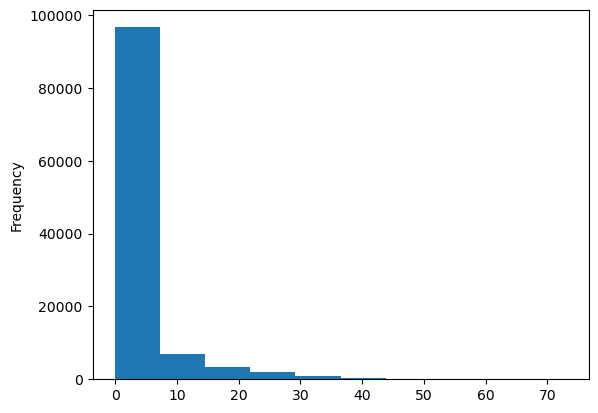

In [50]:
df.HR.plot.hist()